In [ ]:
#Run this
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Run this
!pip install albumentations > /dev/null
!pip install -U efficientnet==0.0.4
%tensorflow_version 1.x
import numpy as np
import pandas as pd
import gc
import keras

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split,StratifiedKFold

from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D, Flatten
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils, plot_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil
import os
import random
from PIL import Image

seed = 10
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

tf.set_random_seed(seed)
    
%matplotlib inline

  Created wheel for efficientnet: filename=efficientnet-0.0.4-cp36-none-any.whl size=14288 sha256=58fa9d48c0fada96f8189a9144a37dcc7ea269effd633e4edf8597b32a732e2d
  Stored in directory: /root/.cache/pip/wheels/5c/34/68/a611a699a28239e964ccf144c0e767cdb5439fee82ec5de6e0
Successfully built efficientnet
TensorFlow 1.x selected.


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [ ]:
#Run this
def unet(input_size=(256,256,3)):
    inputs = Input(input_size)
    
    
# encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
#middle
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same', name = 'up5')(conv5)
# decoder
    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same', name = 'up6')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same', name = 'up7')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'up8')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same', name = 'up9')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

unet = unet()
unet.load_weights("/content/drive/My Drive/CT_SCAN_SARS-COV_2_datasets/final_unet/mosmeddata_unet/63_percent.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
unet.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 32) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [ ]:
from efficientnet import EfficientNetB4
backbone = EfficientNetB4(weights='imagenet',
                          include_top=False,
                          input_shape=(256, 256, 3))




Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
71720960/71719528 [==============================] - 1s 0us/step


In [ ]:
from keras.applications import ResNet50

backbone = ResNet50(include_top=False,
                    weights= None,
                    input_shape=(256, 256, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
a= backbone.layers[44].output
print(a.shape)

NameError: ignored

In [ ]:
#Run this
for layer in unet.layers:
	layer.trainable = False

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 32) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

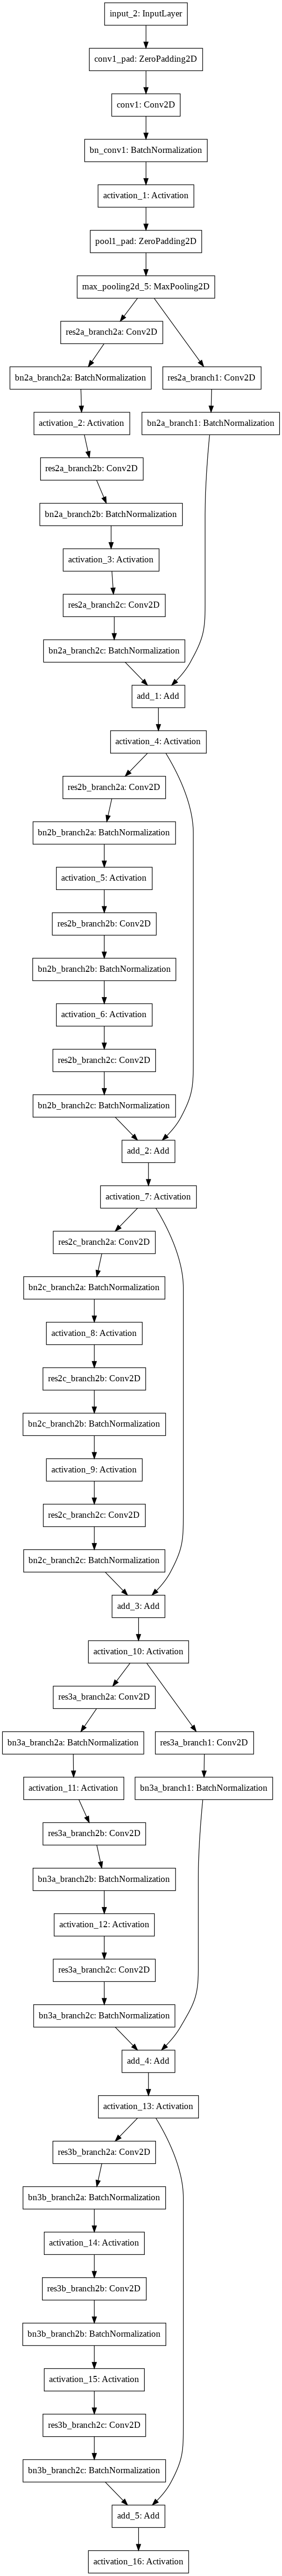

In [ ]:
out = unet.get_layer("up7").output
model_cut_right = Model(inputs = unet.input, outputs = out)
model_cut_right.summary()

out = unet.get_layer("middle_point").output
model_cut_en = Model(inputs = unet.input, outputs = out)
#model_cut_en.summary()

out = backbone.layers[60].output
model_eff = Model(inputs = backbone.input, outputs = out)

#for layer in model_eff.layers:
#	layer.trainable = False

model_eff.summary()



plot_model(model_eff)

In [ ]:
def volume_feature_map(in_shape , filter0=256):
    x_in_0 = Input(in_shape)
    slice_num= x_in_0.shape[-1]
    print(x_in_0.shape)
    x_in = Reshape((256, 256, 3, slice_num))(x_in_0)
    
    branch = []
    for i in range(slice_num):
        x_out = Lambda(lambda x: x[:,:,:,:,i])(x_in)  
        x_out_1 = model_eff(x_out)
        x_out_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_out_1)
        

        x_out_2 = model_cut_right(x_out)
        x_out_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_out_2)
        print(x_out_1.shape)
        print(x_out_2.shape)

        while x_out_1.shape[1]!=x_out_2.shape[1]:
            x_out_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(UpSampling2D((2,2))(x_out_1))

        #x_out_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_out_1)
        #x_out_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_out_2)
        x_out_3 = concatenate([x_out_1, x_out_2], axis=-1)
        
        print(x_out_1.shape)
        print(x_out_2.shape)
        branch.append(x_out_3)
        print(i)
        #if i==0: break
        
    
    x = Concatenate(axis=-1)(branch)
    
    def just_conv(new_in, filter, ker):
        new_in =  Conv2D(filter, (ker, ker), activation='relu', padding='same')(new_in)
        #new_in = BatchNormalization()(new_in)
        return new_in

    def jump_add(new_in, mode, filter):
        if mode==0:
          new_in_1 = just_conv(new_in, filter, 3)
        
        elif mode==1:
          new_in_1 = just_conv(new_in,filter,  3)
          new_in_2 = just_conv(new_in_1, filter, 3)
          new_in_2 = just_conv(new_in_2, filter, 3)
            
          new_in_1 = Add()([new_in_1, new_in_2])

        elif mode==2:
          new_in_1 = just_conv(new_in, filter, 3)
          new_in_2 = just_conv(new_in_1, filter, 3)
          new_in_2 = just_conv(new_in_2, filter,  3)

          new_in_3 = just_conv(new_in_1, filter, 1)
          new_in_3 = just_conv(new_in_3, filter, 1)
          new_in_1 = Add()([new_in_1, new_in_2, new_in_3])

        return new_in_1

    def jump_con(new_in, mode, filter):
        if mode==0:
          new_in_1 = just_conv(new_in, filter, 3)
        
        elif mode==1:
          new_in_1 = just_conv(new_in,filter,  3)
          new_in_2 = just_conv(new_in_1, filter, 3)
          new_in_2 = just_conv(new_in_2, filter, 3)
            
          new_in_1 = concatenate([new_in_1, new_in_2], axis=-1)

        elif mode==2:
          new_in_1 = just_conv(new_in, filter, 3)
          new_in_2 = just_conv(new_in_1, filter, 3)
          new_in_2 = just_conv(new_in_2, filter,  3)

          new_in_3 = just_conv(new_in_1, filter, 1)
          new_in_3 = just_conv(new_in_3, filter, 1)
          new_in_1 = concatenate([new_in_1, new_in_2, new_in_3], axis=-1)

        return new_in_1
    
    

    x = jump_add(x, mode= 0, filter = int(filter0))

    """
    #com_1
    x2=x
    x = jump_add(x, mode= 0, filter = int(filter0/2))
    x = jump_con(x, mode= 2, filter = int(filter0/2))
    x = jump_con(x, mode= 2, filter = int(filter0/4))
    x = concatenate([x, x2], axis=-1)
    #com_1
  

    #com_2 

    x2 = jump_add(x, mode= 0, filter = int(filter0/2))
    x2 = jump_con(x2, mode= 1, filter = int(filter0/2))
    x2 = jump_con(x2, mode= 1, filter = int(filter0/4))
    x = concatenate([x, x2], axis=-1)

    #com_2
  """


    x = GlobalAveragePooling2D()(x)    
    x = LeakyReLU(alpha=0.1) (x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)  
    x = Dense(64, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)
    
    model = Model(x_in_0, x)
    
    
    return model

In [ ]:
model_appended=volume_feature_map((256, 256, 3, 30), filter0=256) 

(?, 256, 256, 3, 30)
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
0
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
1
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
2
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
3
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
4
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
5
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
6
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
7
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
8
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
9
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
10
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
11
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
12
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
13
(?, 32, 32, 32)
(?, 64, 64, 32)
(?, 64, 64, 32)
(?,

In [ ]:
model_appended.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3,  0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 256, 256, 3,  0           input_3[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 256, 256, 3)  0           reshape_1[0][0]                  
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 256, 256, 3)  0           reshape_1[0][0]                  
____________________________________________________________________________________________

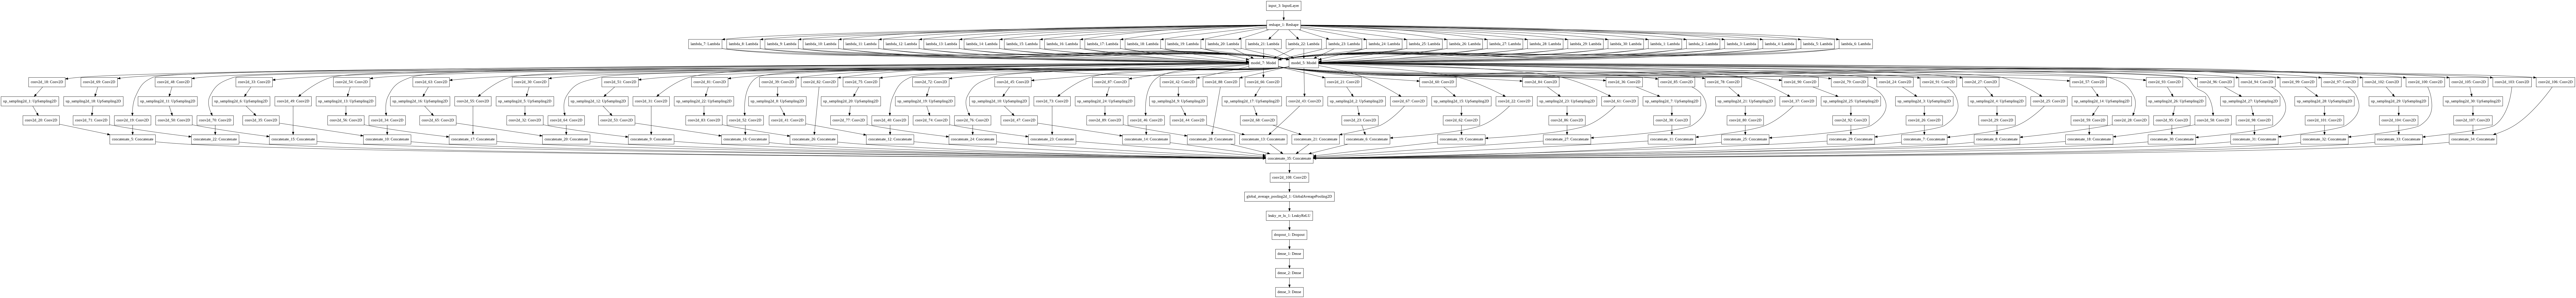

In [ ]:
plot_model(model_appended,
    to_file="model_appended.png")

In [ ]:
#Run this
im_dir = "/content/drive/My Drive/CT_SCAN_SARS-COV_2_datasets/dataset/CLASSIFIER_PATIENT_WISE/train"
a1 = os.path.join(im_dir, os.listdir(im_dir)[0])
a2 = os.path.join(im_dir, os.listdir(im_dir)[1])
bunches = 300
patients = len(os.listdir(a1))+len(os.listdir(a2))

In [ ]:
#Run this
init = 0  #don't exceed 5
bunch_1= bunches/2
bunch_0= bunches/2

if (len(os.listdir(a1))-bunch_1*(init+1)) <2: 
  rest1 = int(len(os.listdir(a1))-bunch_1*(init+1))
else :
  rest1 = 0

if (len(os.listdir(a2))-bunch_0*(init+1)) <2: 
  rest2 = int(len(os.listdir(a2))-bunch_0*(init+1))
else :
  rest2 = 0

X = np.empty((bunches+rest1+rest2, 256, 256, 3, 30), dtype= np.float64)
Y = np.empty((bunches+rest1+rest2), dtype= int)

X.shape

(300, 256, 256, 3, 30)

In [ ]:
int(bunch_0*init), int(bunch_0*(init+1)+rest2)

(0, 150)

In [ ]:
#Run this
import cv2
for j in range(int(bunch_1*init), int(bunch_1*(init+1)+rest1)):
    a1_1= os.path.join(a1, os.listdir(a1)[j])  #patients
    a1_1_1= np.sort(random.sample(os.listdir(a1_1), 30))  #30 sampling
    for m in range(len(a1_1_1)):
        a111_im = os.path.join(a1_1, a1_1_1[m])
        a111_im = cv2.imread(a111_im)
        a111_im = resize(a111_im, (256, 256,3), anti_aliasing=True)
        X[j, :,:,: ,m] = a111_im
        print("patient : " + str(j) + " slice : " +str(m))
        Y[j] = 1

for j in range(int(bunch_1*(init+1)+rest1)+int(bunch_0*init),int(bunch_1*(init+1)+rest1)+int(bunch_0*(init+1)+rest2)):
    a2_1= os.path.join(a2, os.listdir(a2)[j - int(bunch_0)])  #patients
    a2_1_1= np.sort(random.sample(os.listdir(a2_1), 30))  #30 sampling
    for m in range(len(a2_1_1)):
        a211_im = os.path.join(a2_1, a2_1_1[m])
        a211_im = cv2.imread(a211_im)
        a211_im = resize(a211_im, (256, 256, 3), anti_aliasing=True)
        X[j, :,:,:,m ] = a211_im
        print("patient : " + str(j) + " slice : " +str(m))
        Y[j] = 0

patient : 0 slice : 0
patient : 0 slice : 1
patient : 0 slice : 2
patient : 0 slice : 3
patient : 0 slice : 4
patient : 0 slice : 5
patient : 0 slice : 6
patient : 0 slice : 7
patient : 0 slice : 8
patient : 0 slice : 9
patient : 0 slice : 10
patient : 0 slice : 11
patient : 0 slice : 12
patient : 0 slice : 13
patient : 0 slice : 14
patient : 0 slice : 15
patient : 0 slice : 16
patient : 0 slice : 17
patient : 0 slice : 18
patient : 0 slice : 19
patient : 0 slice : 20
patient : 0 slice : 21
patient : 0 slice : 22
patient : 0 slice : 23
patient : 0 slice : 24
patient : 0 slice : 25
patient : 0 slice : 26
patient : 0 slice : 27
patient : 0 slice : 28
patient : 0 slice : 29
patient : 1 slice : 0
patient : 1 slice : 1
patient : 1 slice : 2
patient : 1 slice : 3
patient : 1 slice : 4
patient : 1 slice : 5
patient : 1 slice : 6
patient : 1 slice : 7
patient : 1 slice : 8
patient : 1 slice : 9
patient : 1 slice : 10
patient : 1 slice : 11
patient : 1 slice : 12
patient : 1 slice : 13
patient 

In [ ]:
#Run this
def shuffle_in_unison_scary(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return a, b

X,Y = shuffle_in_unison_scary(X,Y)

In [ ]:
from keras.callbacks import *

model_appended.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

weight_saver = ModelCheckpoint('Jahin_2_0_decoder_res50_train.h5', monitor='accuracy', 
                                save_best_only=True, save_weights_only=True)
annealer = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.0001)

hist = model_appended.fit(x = X , 
                          y = Y, 
                          batch_size = 2,
                          epochs = 40,
                          callbacks = [weight_saver , annealer],
                          validation_split = 0.2,
                          shuffle = False,
                          verbose = 1)

In [ ]:
model_appended.predict(X[28:29])

array([[1.7282919e-07]], dtype=float32)

In [ ]:
Y[28]


0

In [ ]:
X.shape

(300, 256, 256, 3, 30)

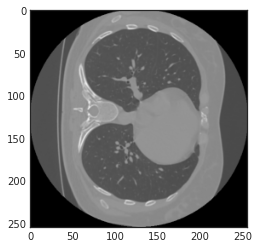

In [ ]:
plt.imshow (X[270,:,:,:,13])

In [ ]:
#Run this
from keras.layers import Multiply
from keras.applications import VGG16

def approach_1_block(in_shape):
    x_in = Input(in_shape)
    slice_num= x_in.shape[-1]
    
    branch = []
    
    def s_e_block(in_block):
        x = GlobalAveragePooling2D()(in_block)
        x = Dense(int(in_block.shape[-1]//2), activation='relu')(x)
        x = Dense(int(in_block.shape[-1]), activation='sigmoid')(x)
        return Multiply()([in_block, x])
    
    
    def attention_block(slice_x):
        basket=[]
        for i in range(5,10):
          name = "up"+str(i)
          out = unet.get_layer(name).output
          
          temp_model = Model(inputs = unet.input, outputs = out)
          x2 = temp_model(slice_x)
          
          """ optional s/e block for later """
          
          x = s_e_block(x2)
          x = Add()([x, x2])
          
          """ optional s/e block for later """
          
          x = Conv2D(64, (1,1), activation= "relu", padding="same")(x)          
          while x.shape[1]!= 256: x= UpSampling2D((2,2))(x)
          x = Conv2D(3, (3,3), activation= "sigmoid", padding="same")(x)
          x = Multiply()([slice_x, x])
      
          basket.append(x)
        x = Concatenate(axis=-1)(basket)
        
        return x
    
   

    for i in range(slice_num):
        print(i)
        x_out = Lambda(lambda x: x[:,:,:,:,i])(x_in)  
        x_out_1= attention_block(x_out)
        ##modify
        x_out_1 = Conv2D(64, (3,3), activation= "relu", padding="same")(x_out_1)
        x_out_1 = MaxPooling2D((2,2))(x_out_1)
        x_out_1 = Conv2D(128, (3,3), activation= "relu", padding="same")(x_out_1)
        x_out_1 = MaxPooling2D((2,2))(x_out_1)
        x_out_1 = Conv2D(256, (3,3), activation= "relu", padding="same")(x_out_1)
        x_out_1 = MaxPooling2D((2,2))(x_out_1)
        x_out_1 = Conv2D(512, (3,3), activation= "relu", padding="same")(x_out_1)
        ##
        x_out_1 = GlobalAveragePooling2D()(x_out_1)
        x_out_1 = LeakyReLU(alpha=0.1) (x_out_1)
        x_out_1 = Dropout(0.1)(x_out_1)
        x_out_1 = Dense(32, activation='relu')(x_out_1)
        
        branch.append(x_out_1)
    
    x = Concatenate(axis=-1)(branch)
    print(x.shape)

    #x = Flatten()(x)
    x = Dense(128, activation='relu')(x)  
    x = Dense(64, activation='relu')(x) 
    x = Dense(1, activation='sigmoid')(x) 
    print(x.shape)
    
    model = Model(x_in, x)
    
    return model


In [ ]:
#Run this
model_approach= approach_1_block((256, 256, 3, 30))
model_approach.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_approach.summary()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
(?, 960)
(?, 1)
Model: "model_605"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 256, 256, 3,  0                                            
__________________________________________________________________________________________________
lambda_91 (Lambda)              (None, 256, 256, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
lambda_92 (Lambda)              (None, 256, 256, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
lambda_93 (Lambda)              (None, 256, 256, 3)  0           input_5[0][0]               

In [ ]:
#Run this
from keras.callbacks import *

weight_saver = ModelCheckpoint('Jahin_3_0_approach_1_SE1.h5', monitor='accuracy', 
                                save_best_only=True, save_weights_only=True)
annealer = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.0001)


hist = model_approach.fit(x = X , 
                          y = Y, 
                          batch_size = 2,
                          epochs = 50,
                          callbacks = [weight_saver , annealer],
                          validation_split = 0.2,
                          shuffle = False,
                          verbose = 1)



Train on 240 samples, validate on 60 samples
Epoch 1/50


FailedPreconditionError: ignored

In [ ]:
model_vgg= VGG16(include_top=False,
                weights="imagenet",
                input_shape=(256, 256, 3))

model_vgg.summary()